**Indian Institute of Information Technology Allahabad**

**MINI PROJECT 3**

**Project Guide:** **PROF. SUDIPTA SIR**

**Topic : Stock Price forecasting using time series analysis**

**Group Members:**
1. Ravi Kumar Sharma - IIT2018108
2. Ratan Kumar - IIT2018136
3. Nilang Vasava - IIT2018147

In [ ]:
print("hello world")

hello world


Importing necessary modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Other datasets:

Dataset link : https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv

Onion Price Dataset : https://www.kaggle.com/ravisane1/market-price-of-onion-2020

National Stock Exchange dataset : https://www.kaggle.com/ramamet4/nse-stocks-database

Now lets load Indian stock price dataset

**Dataset name: banknifty.csv**

**Dataset link:** "https://www.kaggle.com/prokaggler/bank-nifty-5-year-data" 



In [2]:
df = pd.read_csv("/content/banknifty.csv")
df.head(5)

,index,date,time,open,high,low,close
0,BANKNIFTY,20121203,09:16,12125.70,12161.70,12125.70,12160.95
1,BANKNIFTY,20121203,09:17,12161.75,12164.80,12130.40,12130.40
2,BANKNIFTY,20121203,09:18,12126.85,12156.10,12126.85,12156.10
3,BANKNIFTY,20121203,09:19,12157.25,12164.75,12151.60,12164.20
4,BANKNIFTY,20121203,09:20,12162.80,12162.80,12148.20,12151.15


In [9]:
df['close'].min()

8383.3

In [10]:
df['close'].max()

12906.1

**For checking cross correlation in our data firstly plot the data**

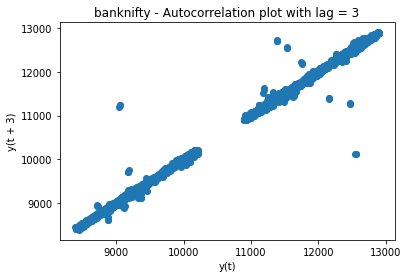

In [3]:
plt.figure()
lag_plot(df['open'], lag=3)
plt.title('banknifty - Autocorrelation plot with lag = 3')
plt.show()

**Ploting the close value of dataset with respect to date**

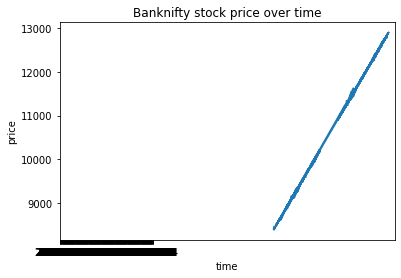

In [12]:
plt.plot(df["open"], df["close"])
plt.xticks(np.arange(0,3670, 10), df['date'][0:3670:10])
plt.title("Banknifty stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

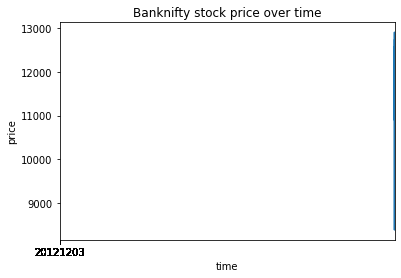

In [5]:
plt.plot(df["date"], df["close"])
plt.xticks(np.arange(0,367, 10), df['date'][0:367:10])
plt.title("Banknifty stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

**Spliting the dataset in to training data(70%) and testing data(30%)**

Then store the predicted value of our model in model_prediction list and then lastly printing the testing mean square error for this dataset.

In [ ]:
train_data, test_data = df[0:int(len(df)*0.03)], df[int(len(df)*0.08):]
training_data = train_data['close'].values
test_data = test_data['close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Here we have ploted the graph of values predicted by our model and actual value available in the dataset so that we can visually analyse the result and accuracy of the given performed model.

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Banknifty Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()

NameError: ignored

Here We have forcasted the price using dataset of apple company.

Importing necessary header files

In [13]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

Defining paremeters for ploting of graphs

In [14]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [17]:
df1 = pd.read_csv('/content/Apple.csv')
# df2= pd.read_csv('amazon.csv')
stock=df1

In [18]:
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,2.665724
1,2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,2.440975
2,2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,2.476697
3,2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.262367
4,2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600.0,2.369532


In [19]:
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')

**Data Preprocessing**
This steps include remove the column we do not need, check for missing value

In [20]:
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
stock.drop(cols, axis=1, inplace=True)
stock = stock.sort_values('Date')

In [21]:
stock.isnull().sum()

Date     0
Close    0
dtype: int64

In [22]:
stock = stock.groupby('Date')['Close'].sum().reset_index()

In [23]:
stock.head()

,Date,Close
0,2000-01-03,3.997768
1,2000-01-04,3.660714
2,2000-01-05,3.714286
3,2000-01-06,3.392857
4,2000-01-07,3.553571


Indexing with time series data

In [24]:
stock = stock.set_index('Date')
stock.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
       '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15'],
      dtype='object', name='Date', length=4811)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [25]:
#y = stock['Close'].resample('M').mean()
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock.Close.resample('M').mean()

Have a quick peek 2017 sales data.

In [26]:
monthly_mean['2018':]

Date
2018-01-31    174.005237
2018-02-28    167.638947
2018-03-31    174.496192
2018-04-30    169.834287
2018-05-31    185.536818
2018-06-30    188.621429
2018-07-31    190.311429
2018-08-31    213.346089
2018-09-30    222.073685
2018-10-31    220.845652
2018-11-30    191.235714
2018-12-31    164.266317
2019-01-31    154.166190
2019-02-28    170.808545
Freq: M, Name: Close, dtype: float64

Visualizing Close time series data

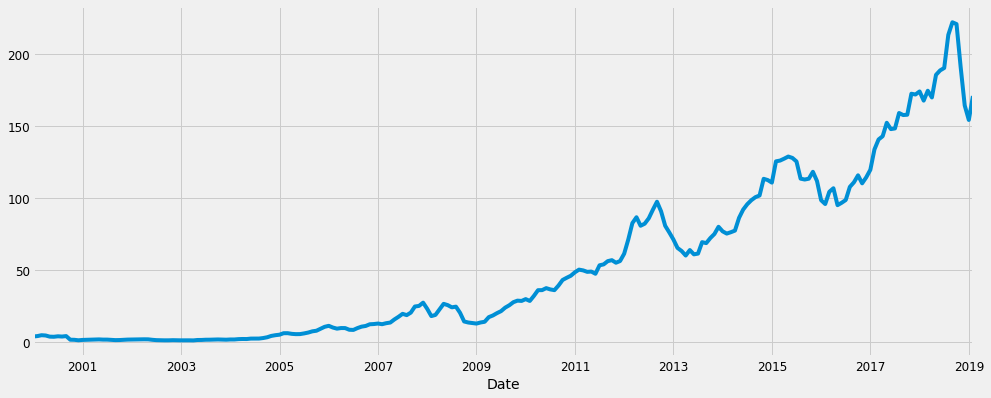

In [27]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.


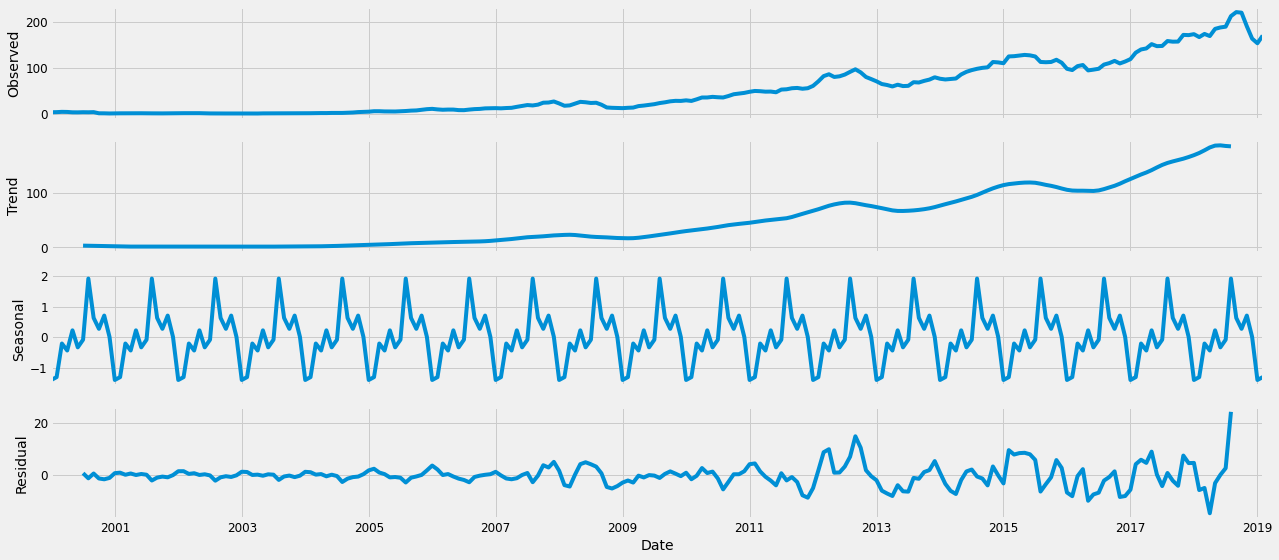

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the Close price is unstable, along with its obvious seasonality.

Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model. ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:`

In [29]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [30]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2643.5019979710623
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2309.334474785128
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1951.0204253540187
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1856.0314687281098
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1890.7953591460855
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1802.9557150994601
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1863.8878931058043
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1819.3731566965241
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2329.035820978036
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2023.3963112669926
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1696.2018573444948
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1614.3277463633804
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1665.565311522837
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1570.4018769472107
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1628.2409469398453
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1617.449565510136
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1398.2204803534112
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1334.9216709589

In [31]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [32]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3166      0.042      7.485      0.000       0.234       0.399
ar.S.L12      -0.3339      0.057     -5.863      0.000      -0.446      -0.222
ma.S.L12      -0.7985      0.059    -13.560      0.000      -0.914      -0.683
sigma2        25.9474      1.292     20.077      0.000      23.414      28.480


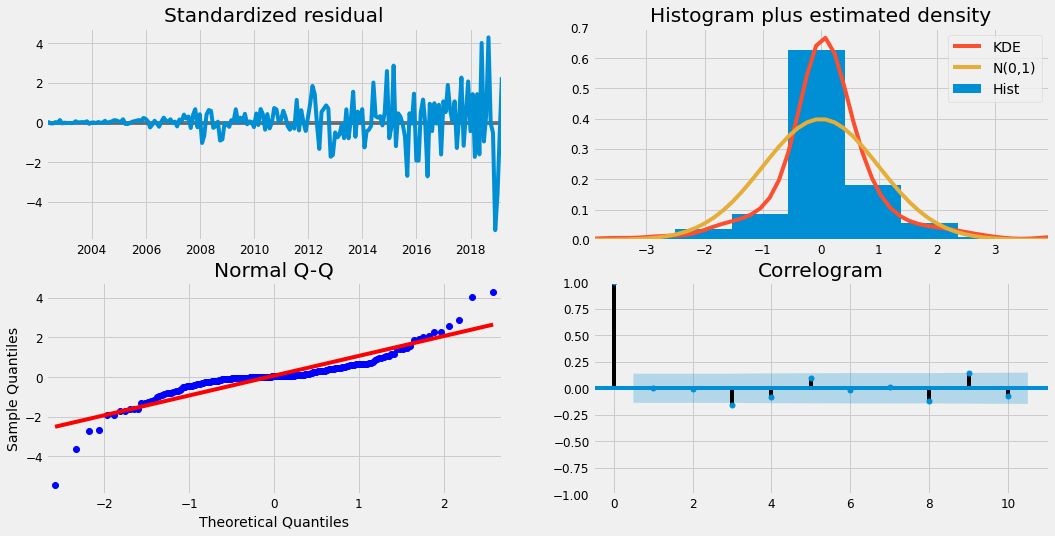

In [33]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted Close to real close price of the time series, and we set forecasts to start at 2017-12-31 to the end of the data.

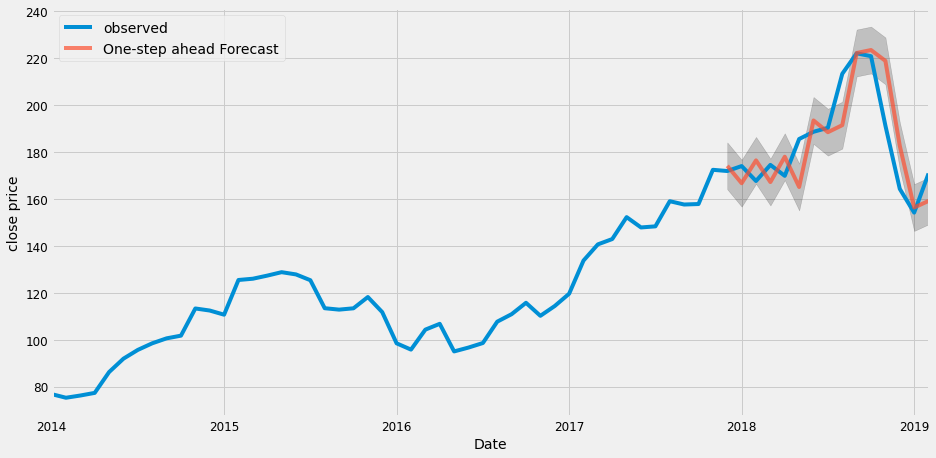

In [34]:
pred = results.get_prediction(start=pd.to_datetime('2017-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly_mean['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [35]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2017-12-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 161.89


In [36]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 12.72


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily close price in the test set within portion... of the real close price

Producing and visualizing forecasts

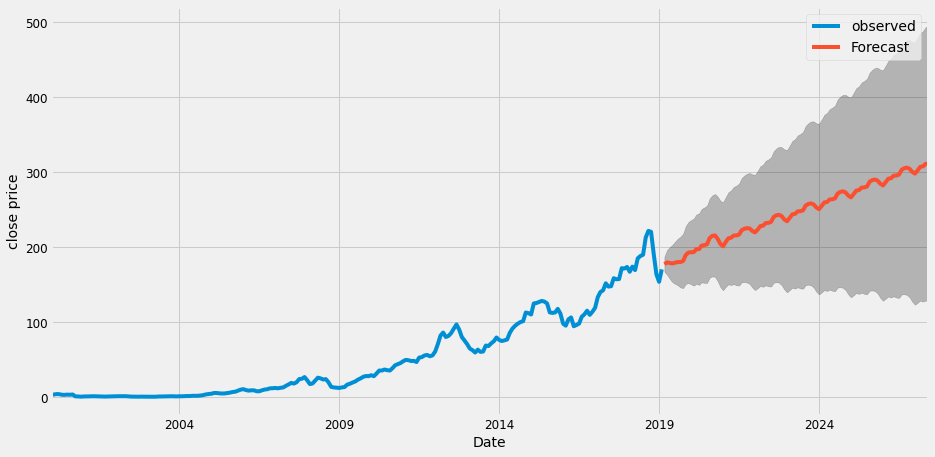

In [37]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('close price')

plt.legend()
plt.show()

Our model clearly captured close price seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

In [38]:
print("Thanx and Have a nice day!")

Thanx and Have a nice day!
